<a href="https://colab.research.google.com/github/JooEun-Jeong/WebCrawling/blob/main/%EC%82%B0%ED%95%99%EA%B3%BC%EC%A0%9C_%EC%8B%9C%EA%B0%81%ED%99%94%EC%9E%90%EB%8F%99%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Information:
  def __init__(self, con, num, designModel, armGNIn, armType, onlyInter, masking, outcomPri, outcomeSec, allo, timePri, timeSec):
    self.condition = con
    self.enrollment = num
    self.designModel = designModel
    self.armGroupNIntervnetion = armGNIn
    self.armType = armType
    self.onlyInterventionName = onlyInter
    self.masking = masking
    self.outcomePri = outcomPri
    self.outcomeSec = outcomeSec
    self.allocation = allo
    self.timeFramePri = timePri
    self.timeFrameSec = timeSec

In [ ]:
import requests

## data extraction
def get_info(url):
  response = requests.get(url).json()

  condition = ""
  enrollment = 0
  designModel = ""
  armGroupNIntervnetion = {}
  armType = []
  onlyInterventionName = []
  masking = "none"
  outcomePri = []
  outcomeSec = []
  allocation = "R/nonR"
  timeFramePri = []
  timeFrameSec = []

  protocolSection = response['FullStudiesResponse']['FullStudies'][0]['Study']['ProtocolSection']

  #condition
  condition = protocolSection['ConditionsModule']['ConditionList']['Condition']

  #enrollment
  enrollment = protocolSection['DesignModule']['EnrollmentInfo']['EnrollmentCount']

  designModel = protocolSection['DesignModule']['DesignInfo']['DesignInterventionModel']

  #Allocation
  allocation = protocolSection['DesignModule']['DesignInfo']['DesignAllocation']

  # outcome primary
  for i in range(len(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'])):
    outcomePri.append(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'][i]['PrimaryOutcomeMeasure'])

  # outcome secondary
  for i in range(len(protocolSection['OutcomesModule']['SecondaryOutcomeList']['SecondaryOutcome'])):
    outcomeSec.append(protocolSection['OutcomesModule']['SecondaryOutcomeList']['SecondaryOutcome'][i]['SecondaryOutcomeMeasure'])

  #armGroupName
  for i in range(len(protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'])):
    armLabel = protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'][i]['ArmGroupLabel']
    armIntervention = protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'][i]['ArmGroupInterventionList']['ArmGroupInterventionName']
    armGroupNIntervnetion[armLabel] = armIntervention

  #armType
  for i in range(len(protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'])):
    armt = protocolSection['ArmsInterventionsModule']['ArmGroupList']['ArmGroup'][i]['ArmGroupType']
    armType.append(armt)

  #interventionName
  for i in range(len(protocolSection['ArmsInterventionsModule']['InterventionList']['Intervention'])):
    onlyInterventionName.append(protocolSection['ArmsInterventionsModule']['InterventionList']['Intervention'][i]['InterventionName'])

  #masking
  masking = protocolSection['DesignModule']['DesignInfo']['DesignMaskingInfo']['DesignMasking']

  #timeFramePri
  for i in range(len(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'])):
    timeFramePri.append(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'][i]['PrimaryOutcomeTimeFrame'])

  #timeFrameSec
  for i in range(len(protocolSection['OutcomesModule']['PrimaryOutcomeList']['PrimaryOutcome'])):
    timeFrameSec.append(protocolSection['OutcomesModule']['SecondaryOutcomeList']['SecondaryOutcome'][i]['SecondaryOutcomeTimeFrame'])

  return Information(condition, enrollment, designModel, armGroupNIntervnetion, armType, onlyInterventionName, masking, outcomePri, outcomeSec, allocation, timeFramePri, timeFrameSec)

In [ ]:
# 좌표 class
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [ ]:
## 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [79]:
def visualization(info):
  ##initialize
  condition = info.condition
  enrollment = info.enrollment
  designModel = info.designModel
  armGroupNIntervnetion = info.armGroupNIntervnetion
  armType = info.armType
  onlyInterventionName = info.onlyInterventionName
  masking = info.masking
  outcomePri =info.outcomePri
  outcomeSec = info.outcomeSec
  allocation = info.allocation
  timeFramePri = info.timeFramePri
  timeFrameSec = info.timeFrameSec


  plt.style.use('default') #스타일 설정: https://hong-yp-ml-records.tistory.com/88
  plt.rcParams['figure.figsize'] = (20, 15) # 차트의 기본 크기 설정
  plt.rcParams['font.size'] = 10 # fontsize

  fig, ax = plt.subplots()
  ax.plot() # 0번: x값, #1번: y값
  plt.axis('off') # 축 없애는 명령어

  #box1 style
  box1 = {'boxstyle': 'round', 
          'ec': (1.0, 0.5, 0.5), # ec: edgeColor, fc: faceColor
          'fc': (1.0, 0.8, 0.8)}

  #population
  ######point######## 초기화
  startPoint = Point(10, 10) 
  startW = 4
  startH = 4
  ###################
  ax.add_patch(
      patches.Rectangle(
        (startPoint.x, startPoint.y), # bottom and left rect
          startW, #너비
          startH, #높이
          edgecolor = 'blue',
          # facecolor = 'red',
          fill = False
      )
  )
  ax.text(startPoint.x+startW/2 -1, startPoint.y+startH, 'Population', bbox = box1)
  for i in range(len(condition)):
    ax.text(startPoint.x + 0.3, startPoint.y+startH - 0.5 -i*0.3, str(condition[i]))

  # Number, Masking
  ######point########
  NumberPoint = Point(startPoint.x+startW, startPoint.y + startH/2) 
  numberW = 2
  ###################
  ax.add_patch(
      patches.Arrow(
          NumberPoint.x, NumberPoint.y, numberW, 0, width=0.5 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
      )
  )
  ax.text(NumberPoint.x+0.3, NumberPoint.y+0.3, 'N='+str(enrollment))
  ax.text(NumberPoint.x+0.3, NumberPoint.y-0.3, 'M='+str(masking)) 

  # allocation
  ######point########
  radius = 0.5
  allocationPoint = Point(NumberPoint.x+numberW+radius, NumberPoint.y) 
  ###################
  ax.add_patch(
      patches.Circle(
          (allocationPoint.x, allocationPoint.y), radius
      )
  )
  ax.text(allocationPoint.x-0.1, allocationPoint.y, str(allocation)[0])

  #branch
  ######point########
  armGLinePoint1 = Point(allocationPoint.x + radius, allocationPoint.y) 
  armGW = 1
  armGArrowW = 7
  ###################
  colorBranch = ['lightcoral', 'gold', 'limegreen', 'forestgreen', 'cornflowerblue', 'royalblue', 'violet', 'pink']
  colorDict = {'Experimental': 'lightcoral', 'Active Comparator': 'gold', 'Placebo Comparator': 'limegreen', 'No Intervention': 'forestgreen', 'Other': 'cornflowerblue', 'Sham Comparator': 'royalblue', None: 'violet'}
  setArmGroup = set(armType) # 중복 없애기 위해 집합 함수 사용함
  ListArmGroup = list(setArmGroup) # 집합을 리스트로! 
  fontArm = {'size': 9}
  numBranch = len(armGroupNIntervnetion)
  armGroup = list(armGroupNIntervnetion.items())
  for i in range(numBranch):
    color = colorDict[armType[i]]
    
    ## design model에 따라 모양 다르게 하기
    if(designModel=="Factorial Assignment"): #아직 수정 안함.
      numIntervention = int(math.sqrt(numBranch))
      ax.plot([armGLinePoint1.x,armGLinePoint1.x+armGW], [armGLinePoint1.y, startPoint.y+startH-i*((startH)/(numBranch-1))], colorBranch[int(i/2)]) ## startH를 넘을 경우도 고려해야됨. 나중에 수정.
      ax.plot([armGLinePoint1.x+armGW, armGLinePoint1.x+armGW + armGArrowW/2], [startPoint.y+startH-i*((startH)/(numBranch-1)), startPoint.y+startH-i*((startH)/(numBranch-1))],colorBranch[int(i/2)])
      ax.add_patch(
          patches.Arrow(
            armGLinePoint1.x + armGW + armGArrowW/2, startPoint.y+startH-i*((startH)/(numBranch-1)), armGArrowW/2, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
            , edgecolor = colorBranch[numIntervention -int(i/2) -1], facecolor = colorBranch[ numIntervention - int(i/2)-1]
        )
      )

    elif(designModel=="Parallel Assignment"):
      ax.plot([armGLinePoint1.x,armGLinePoint1.x+armGW], [armGLinePoint1.y, startPoint.y+startH-i*((startH)/(numBranch-1))], color) ## startH를 넘을 경우도 고려해야됨. 나중에 수정.
      ax.add_patch(
          patches.Arrow(
            armGLinePoint1.x+armGW, startPoint.y+startH-i*((startH)/(numBranch-1)), armGArrowW, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
            , edgecolor = color, facecolor = color
        )
      )

    elif(designModel == "Single Group Assignment"):
      ax.plot([armGLinePoint1.x,armGLinePoint1.x+armGW], [armGLinePoint1.y, startPoint.y+startH-i*((startH)/(numBranch-1))], color) ## startH를 넘을 경우도 고려해야됨. 나중에 수정.
      ax.add_patch(
          patches.Arrow(
            armGLinePoint1.x+armGW, startPoint.y+startH-i*((startH)/(numBranch-1)), armGArrowW, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
            , edgecolor = color, facecolor = color
        )
      )

    elif(designModel == "Crossover Assignment"): # 2개 군만 있다고 가정.
      ax.plot([armGLinePoint1.x,armGLinePoint1.x+armGW], [armGLinePoint1.y, startPoint.y+startH-i*((startH)/(numBranch-1))], color) ## startH를 넘을 경우도 고려해야됨. 나중에 수정.
      ax.add_patch(
          patches.Arrow(
            armGLinePoint1.x+armGW, startPoint.y+startH-i*((startH)/(numBranch-1)), armGArrowW/3, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
            , edgecolor = color, facecolor = color
        )
      )
      ax.plot([armGLinePoint1.x+armGW+armGArrowW/3,armGLinePoint1.x+armGArrowW/3*2], [startPoint.y+startH-i*((startH)/(numBranch-1)), startPoint.y  + i*((startH)/(numBranch-1))], color)
      ax.add_patch(
          patches.Arrow(
            armGLinePoint1.x + armGArrowW/3*2, startPoint.y + startH - i*((startH)/(numBranch-1)), armGArrowW/3, 0, width=0.05 # 시작지점x, 시작y, x얼마나, y얼마나, 화살표두께
            , edgecolor = colorDict[ListArmGroup[numBranch - i -1]], facecolor = colorDict[ListArmGroup[numBranch - i -1]]
        )
      )

    armGName = str(armGroup[i][0])
    armGInter = str(armGroup[i][1])
    ax.text(armGLinePoint1.x+armGW + 0.1 , startPoint.y+startH-i*((startH)/(numBranch-1))+0.1, armGName+": \n"+armGInter, fontdict=fontArm)

  #show which color follows which arm group 
  if(designModel != "Factorial Assignment"):
    for i in range(len(setArmGroup)): 
      ax.plot([startPoint.x, startPoint.x + 1], [startPoint.y-0.4 -i*0.2, startPoint.y-0.4-i*0.2], colorDict[ListArmGroup[i]])
      ax.text(startPoint.x + 1 + 0.1 , startPoint.y-0.4-i*0.2, ListArmGroup[i])
  else:
    for i in range(int(math.sqrt(numBranch))):
      ax.plot([startPoint.x, startPoint.x + 1], [startPoint.y-0.4 -i*0.2, startPoint.y-0.4-i*0.2], colorBranch[i])
      ax.text(startPoint.x + 1 + 0.1 , startPoint.y-0.4-i*0.2, onlyInterventionName[i])

  # outcome measure
  ######point########
  outArrowPoint = Point(allocationPoint.x, allocationPoint.y- startH/4*3) 
  outArrowW = armGLinePoint1.x + armGArrowW - allocationPoint.x + radius*2
  outArrowH = startH/2
  ###################
  ax.plot([outArrowPoint.x, outArrowPoint.x+outArrowW], [outArrowPoint.y, outArrowPoint.y], 'b')
  ax.text(outArrowPoint.x, outArrowPoint.y+0.1, "Outcome Measure")

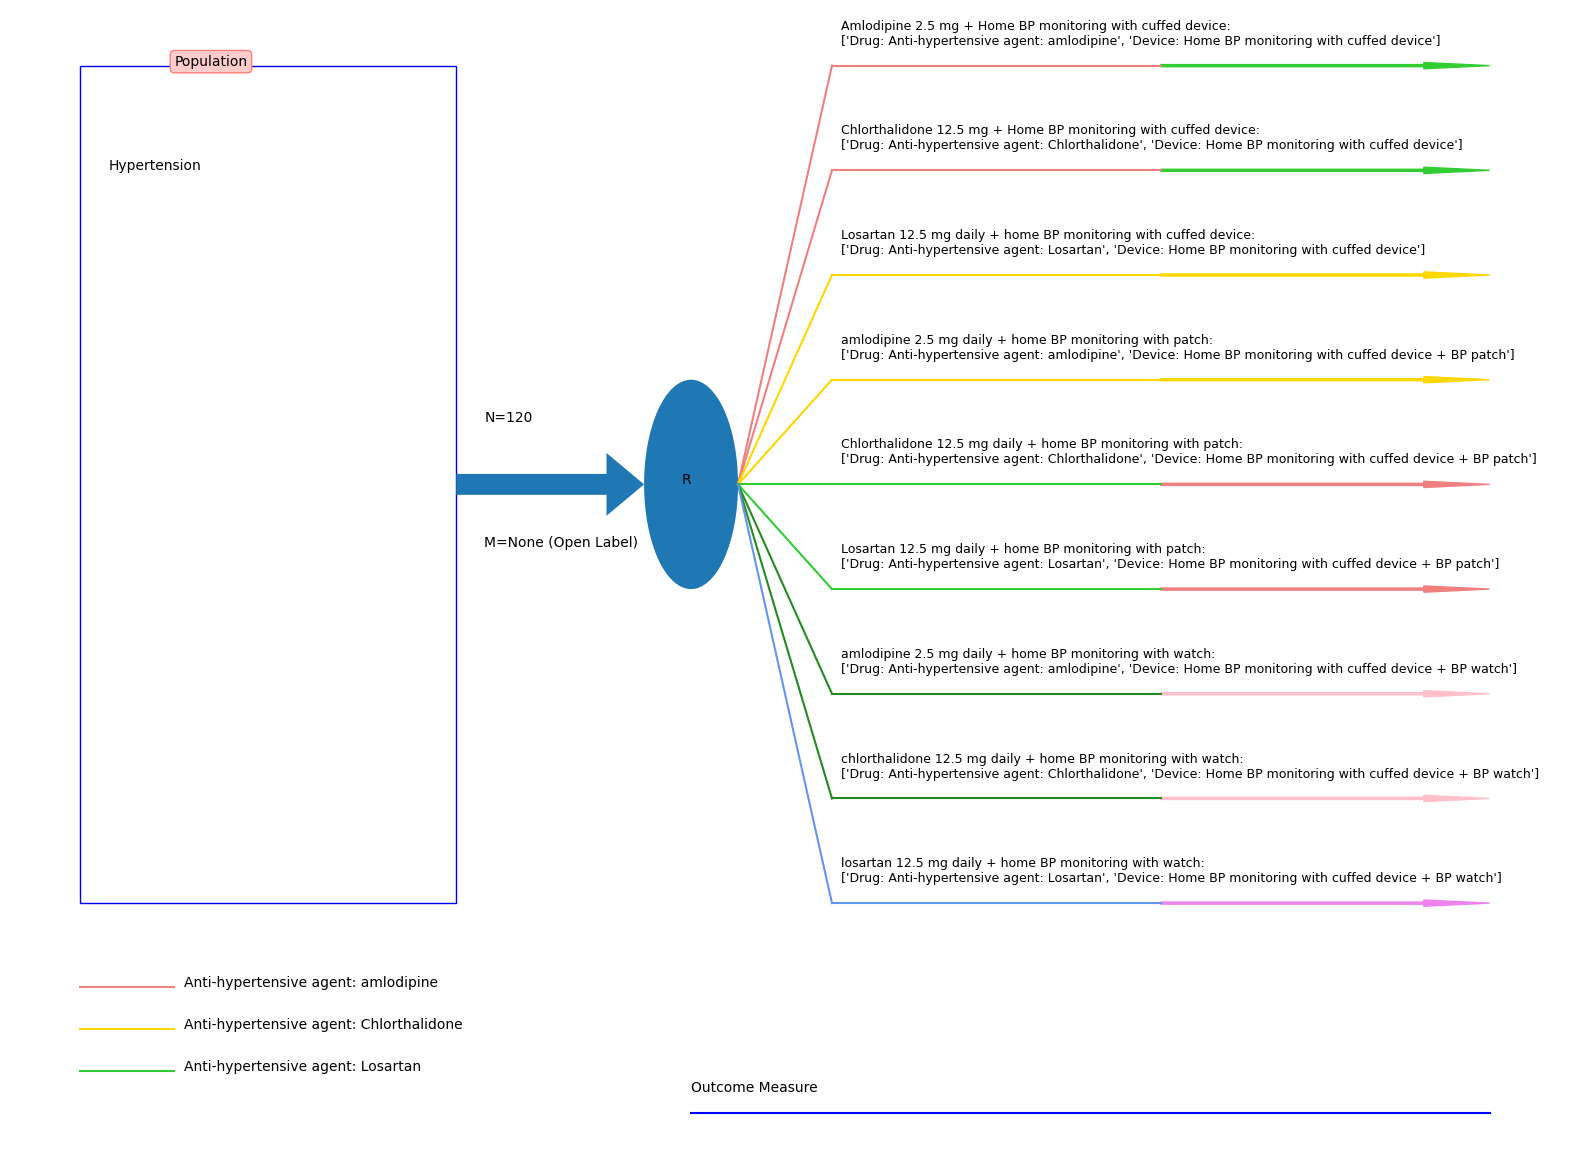

In [80]:
url5 = "https://www.clinicaltrials.gov/api/query/full_studies?expr=NCT05370599&fmt=JSON"
case5 = get_info(url5)
visualization(case5)

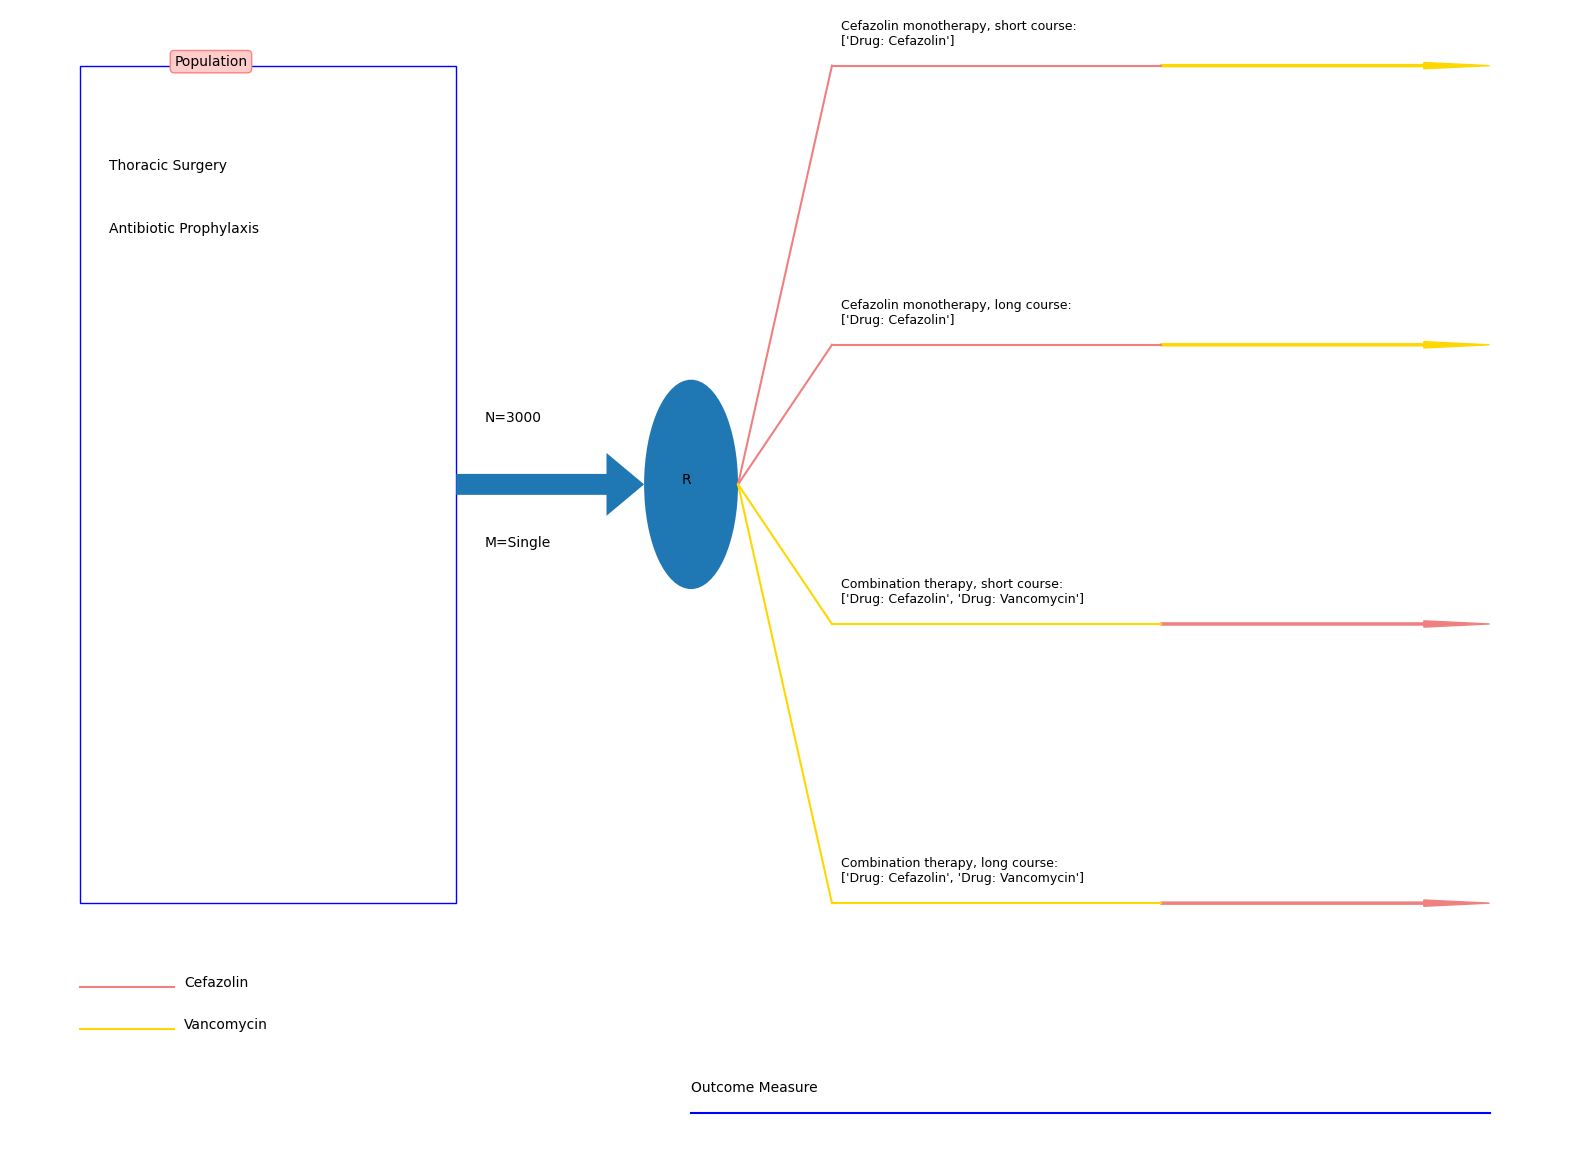

In [81]:
########### case 1
url1 = "https://clinicaltrials.gov/api/query/full_studies?expr=Prevention+of+Infections+in+Cardiac+Surgery+%28PICS%29&min_rnk=1&max_rnk=&fmt=json"
case1 = get_info(url1)
visualization(case1)

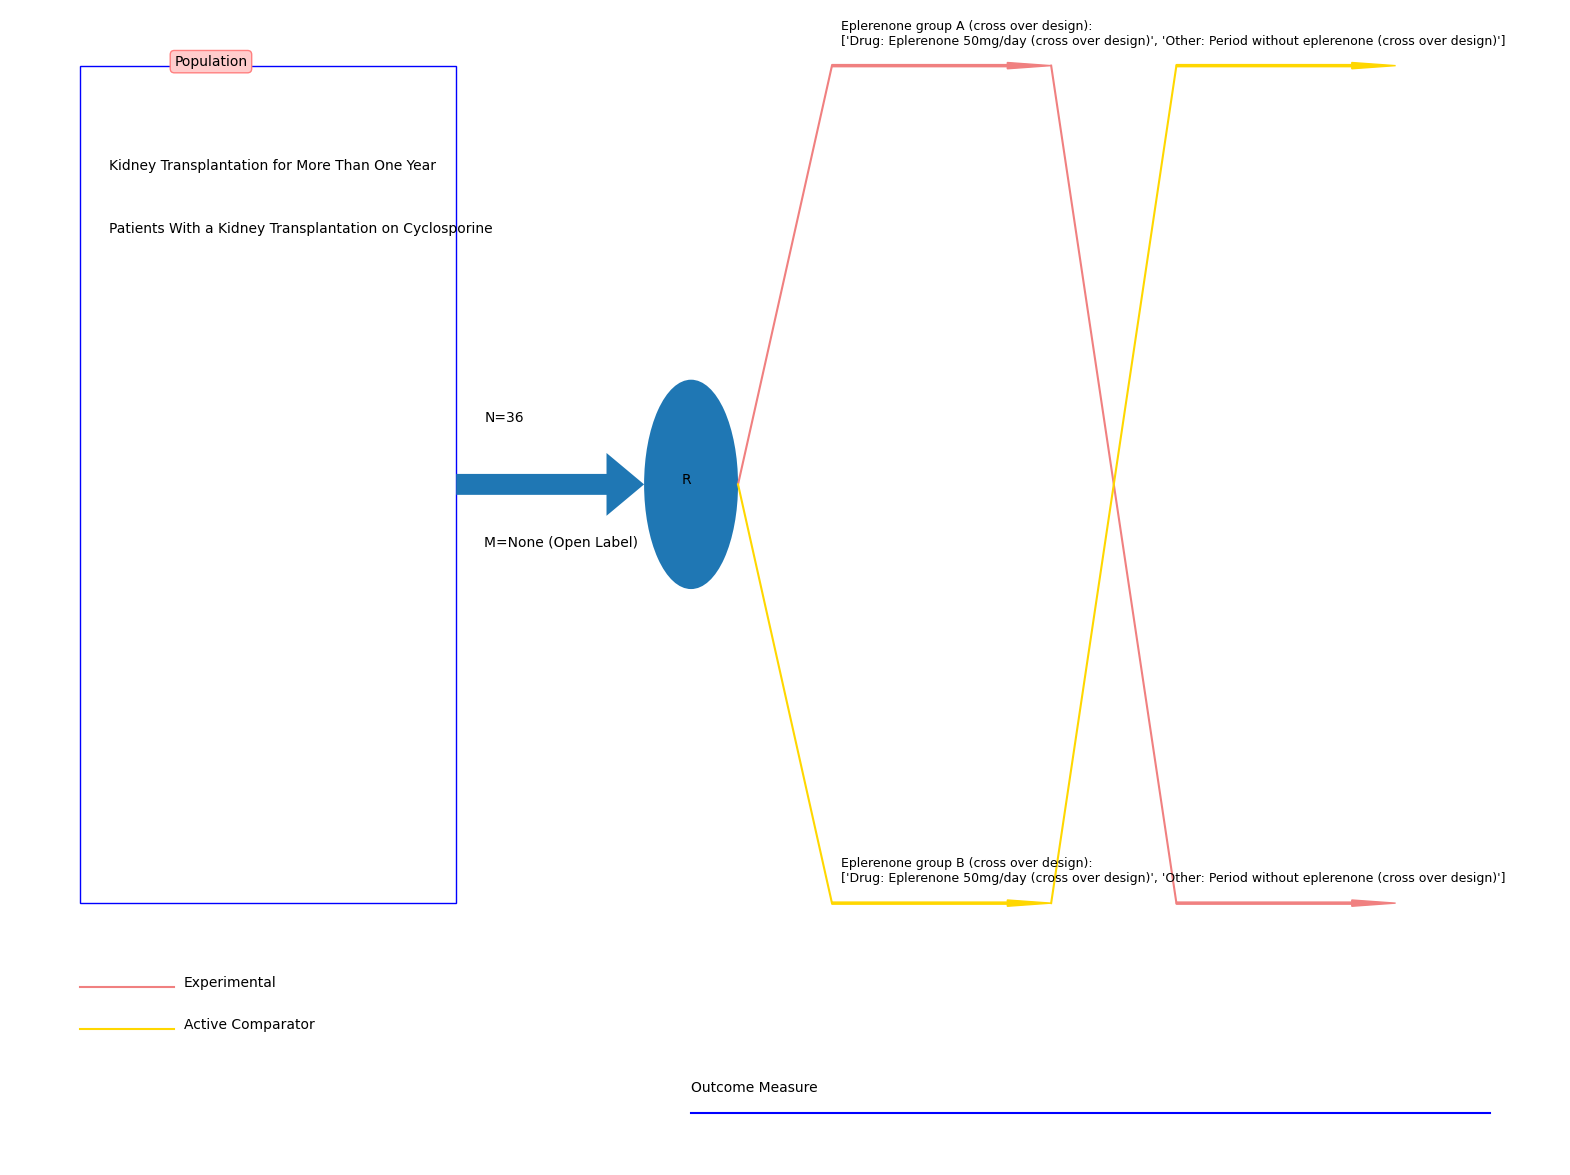

In [82]:
##################################
#case 3 CrossOver
url3 = 'https://www.clinicaltrials.gov/api/query/full_studies?expr=The%20Effect%20of%20Eplerenone%20on%20the%20Evolution&fmt=JSON'
case3 = get_info(url3)
visualization(case3)

In [ ]:
## url 변경
import re
def changeURL(url):
  expr = re.search("NCT[0-9]+", url)
  expr = expr.group()
  if((expr == None) or ("&fmt=json" in url)):
    newURL = url
  else:
    newURL = "https://clinicaltrials.gov/api/query/full_studies?expr=" + expr + "&fmt=json"
  return newURL

changeURL("https://www.clinicaltrials.gov/ct2/show/NCT05411042?draw=2&rank=3")

'https://clinicaltrials.gov/api/query/full_studies?expr=NCT05411042&fmt=json'

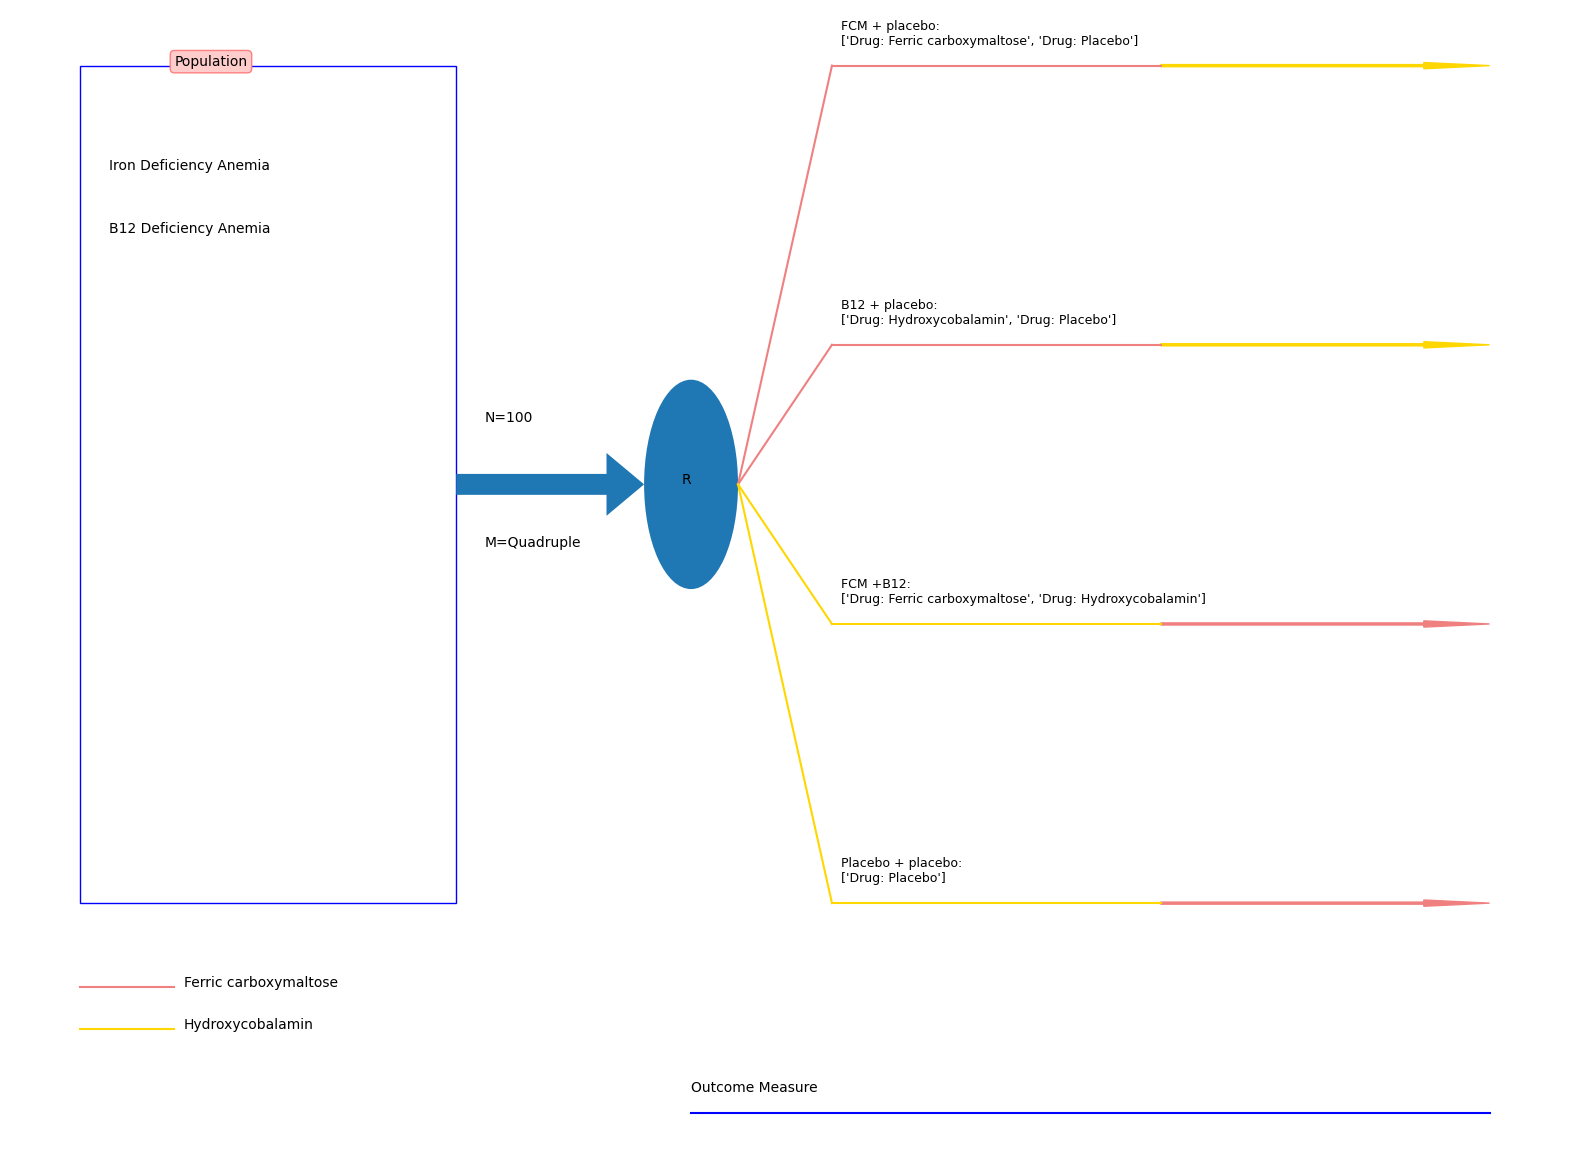

In [83]:
################################## Factorial
#case 2
url2 = 'https://www.clinicaltrials.gov/api/query/full_studies?expr=Do+Iron+And+Vitamin+B12+Injections+Given+Together&fmt=JSON'
case2 = get_info(url2)
visualization(case2)

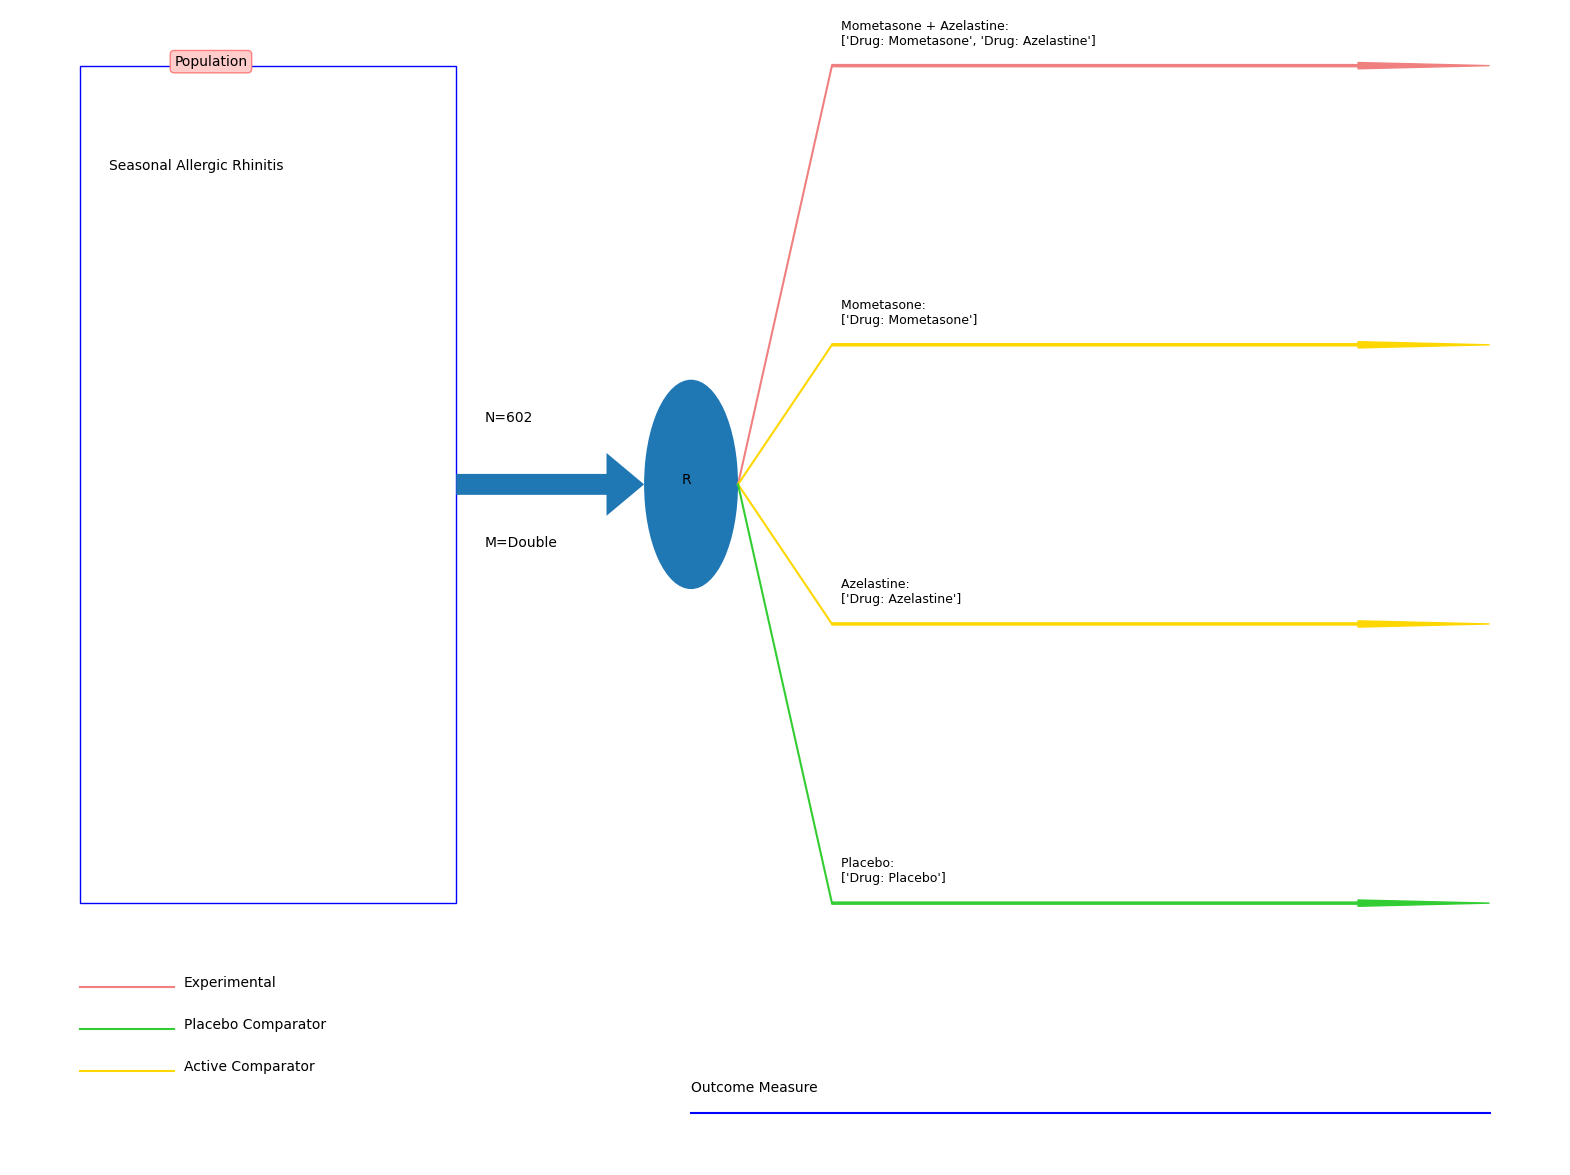

In [84]:
##################################
#case 4
url4 = 'https://www.clinicaltrials.gov/api/query/full_studies?expr=Prospective,%20Randomized,%20Multinational,%20Multicenter,%20Double-blind,%20Placebo%20and%20Active%20Controlled%20Trial%20in%204%20Parallel-groups&fmt=JSON'
case4 = get_info(url4)
visualization(case4)